In [39]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.stats import norm, boxcox
from scipy import stats


In [3]:
#importing dataset
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Cheking no. of rows and columns
# name of columns.
# type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
# checking 5 number summary.
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
# Checking null
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# checking outliers

In [7]:
# I am using blox plot to identify the outliers

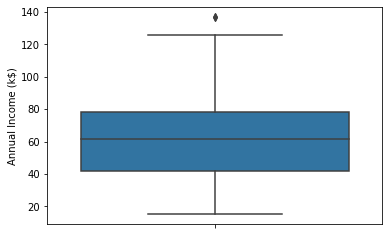

In [8]:
sns.boxplot(y="Annual Income (k$)", data=df)

# treating the outliers.

In [10]:
Q1 = df['Annual Income (k$)'].quantile(0.25)
Q3 = df['Annual Income (k$)'].quantile(0.75)
IQR = Q3 - Q1

In [11]:
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)

low_limit is -13.25
up_limit is 132.75


In [12]:
outlier = []
for x in df['Annual Income (k$)']:
    if ((x> up_lim) or (x<low_lim)):
         outlier.append(x)
print(' outlier in the dataset is', outlier)

 outlier in the dataset is [137, 137]


In [13]:
len(outlier)
# there is only 2 outlier value

2

In [14]:
# We are replacing outlier with median.
# beacuse the total no. of observation are low.
# so we can not drop those outliers value.
# median are not affected by outlier.

In [15]:
#replacing outlier value which is 137 with mean=60.56
df.loc[df['Annual Income (k$)'] >= 137, 'Annual Income (k$)'] = 61.5

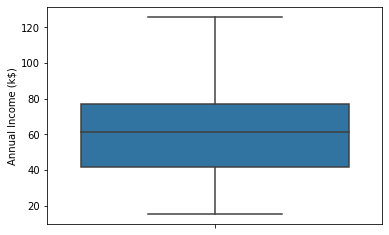

In [16]:
#outlier is removed now
sns.boxplot(y="Annual Income (k$)", data=df)

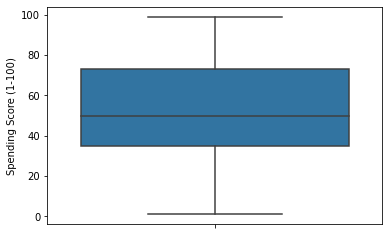

In [17]:
#checking outlier for Spending Score
sns.boxplot(y="Spending Score (1-100)", data=df)
# no outlier

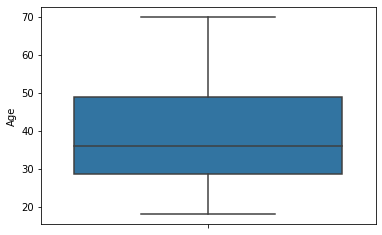

In [18]:
#checking outlier for Age
sns.boxplot(y="Age", data=df)
# no outlier

# checking skewness for spending score

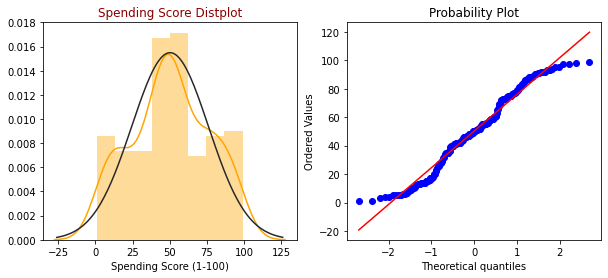

In [19]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(df["Spending Score (1-100)"], fit=norm, color="orange")
plt.title("Spending Score Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(df["Spending Score (1-100)"], plot = plt)
plt.show()

In [20]:
# no need for skewness correction

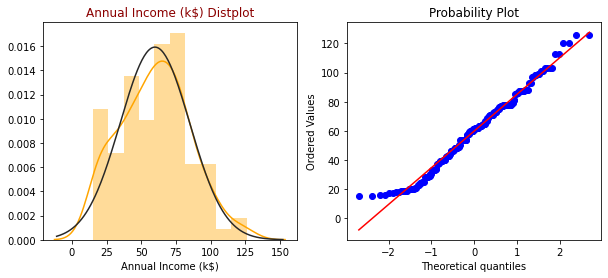

In [21]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(df["Annual Income (k$)"], fit=norm, color="orange")
plt.title("Annual Income (k$) Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(df["Annual Income (k$)"], plot = plt)
plt.show()

In [22]:
# no need for skewness correction

# Visualizing the annual income vs spending score.
This will help us in deciding how many cluster we need.

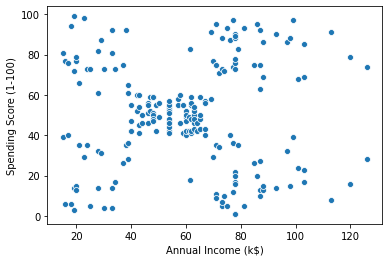

In [23]:
sns.scatterplot(x="Annual Income (k$)",
                    y="Spending Score (1-100)",
                    data=df)


In [24]:
# making cluster on these two features 1. annual income 2. spending score

In [25]:
clus = df.iloc[:,[3,4]].values

In [26]:
# first we need to decide the number of cluster
# for this we use elbow curve.
# by seeing the elbow curve and ealier scater plot we can easily decide
#how many cluster we accuanly need.

In [28]:
# wcss= within cluster sum of sqaures
# we need to calculate the wcss beucase we need the elbow curve
# to identify the no. of cluster requirement.
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(clus)

  wcss.append(kmeans.inertia_)

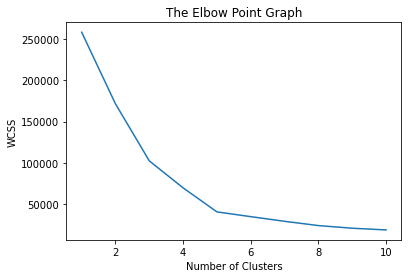

In [29]:
# draw elbow graph

fig = plt.figure()
ax = fig.add_subplot(111, xlabel="Number of Clusters", ylabel="WCSS")
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')

plt.show()

In [30]:
# optimum value of cluster is 6
# we choose the no. of cluster after which the decrease in wcss become low or almost constant.


In [31]:
# training the k means algo
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(clus)

print(Y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 0 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 5 1 5 1 5 1
 5 1 5 1 5 1 5 1 5 1 5 1 5 1 2]


In [32]:
print(np.unique(Y))
#no. of cluster


[0 1 2 3 4 5]


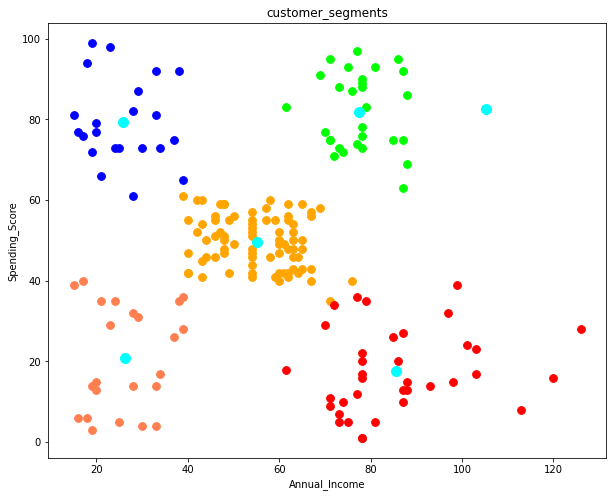

In [33]:
plt.figure(figsize=(10,8))
plt.scatter(clus[Y==0,0], clus[Y==0,1], s=60, c='orange', label='Cluster 1')
plt.scatter(clus[Y==1,0], clus[Y==1,1], s=60, c='red', label='Cluster 2')
plt.scatter(clus[Y==2,0], clus[Y==2,1], s=60, c='lime', label='Cluster 3')
plt.scatter(clus[Y==3,0], clus[Y==3,1], s=60, c='coral', label='Cluster 4')
plt.scatter(clus[Y==4,0], clus[Y==4,1], s=60, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('customer_segments')
plt.xlabel('Annual_Income')
plt.ylabel('Spending_Score')
plt.show()


In [34]:
# In the above graph we have only 5 cluster and we accutaly write the code for 6 cluster.
# so we can say that we only need 5 cluster.
# now we will optimize our code to get 5 cluster.


In [35]:
# training the k means algo
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(clus)

print(Y)

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 1 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


In [36]:
print(np.unique(Y))
#no. of cluster

[0 1 2 3 4]


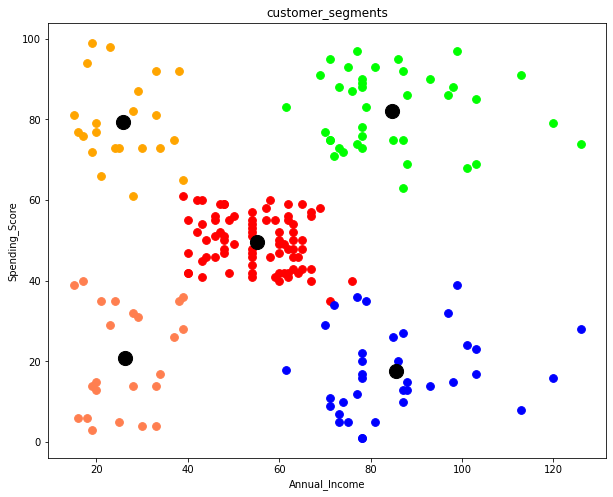

In [37]:
plt.figure(figsize=(10,8))
plt.scatter(clus[Y==0,0], clus[Y==0,1], s=60, c='orange', label='Cluster 1')
plt.scatter(clus[Y==1,0], clus[Y==1,1], s=60, c='red', label='Cluster 2')
plt.scatter(clus[Y==2,0], clus[Y==2,1], s=60, c='lime', label='Cluster 3')
plt.scatter(clus[Y==3,0], clus[Y==3,1], s=60, c='coral', label='Cluster 4')
plt.scatter(clus[Y==4,0], clus[Y==4,1], s=60, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='black')

plt.title('customer_segments')
plt.xlabel('Annual_Income')
plt.ylabel('Spending_Score')
plt.show()

# Conclusion

In [38]:
# we can clearly see the 5 cluster with distinct sepration between each datapoints.
# using this info we can run target advertisment for diffrent group with diffrent need.
# to increase our sales and profit.
# we can also decide to provide coupon and we can messure the effect of coupon on sales in diffrent groups.

#done